In [2]:
import awkward as ak 
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

# Events = pq.read_table("Events.parquet")



# Event = Events[Events["HLT_Diphoton30EB_18EB_R9Id_OR_IsoCaloId_AND_HE_R9Id_DoublePixelVeto_Mass55"]]

In [3]:
Events = ak.from_parquet("Events.parquet")

In [3]:
import ROOT

In [3]:
survived_num = len(Event)
survived_num

11906

In [4]:
gen = Events.GenPart

# Step 1: Select all prompt photons (pdgId == 22)
photons = gen[gen.pdgId == 22]

# Step 2: Get mother indices for each photon
mother_idx = photons.genPartIdxMother  # shape: (n_events, variable)

# Step 3: Check if mother's pdgId == 35
from_a_mask = gen[mother_idx].pdgId == 35  # shape: (n_events, variable)

# Step 4: Apply mask to get only photons from a
photons_from_a = photons[from_a_mask]

In [5]:
pho_from_a_pt = photons_from_a.pt
pho_from_a_eta = photons_from_a.eta 
pho_from_a_phi = photons_from_a.phi

pho_from_a_pt_1 = pho_from_a_pt[:,0]
pho_from_a_pt_2 = pho_from_a_pt[:,1]
pho_from_a_eta_1 = pho_from_a_eta[:,0]  
pho_from_a_eta_2 = pho_from_a_eta[:,1]
pho_from_a_phi_1 = pho_from_a_phi[:,0]
pho_from_a_phi_2 = pho_from_a_phi[:,1]

# Sort the selected photons by pt in descending order (per event)
sorted_photons = photons_from_a[ak.argsort(photons_from_a.pt, axis=1, ascending=False)]

# Extract pt, eta, phi for leading and subleading photons
lead_pt_pho_gen  = sorted_photons.pt[:, 0]
sublead_pt_pho_gen = sorted_photons.pt[:, 1]

lead_eta_pho_gen = sorted_photons.eta[:, 0]
sublead_eta_pho_gen = sorted_photons.eta[:, 1]

lead_phi_pho_gen = sorted_photons.phi[:, 0]
sublead_phi_pho_gen = sorted_photons.phi[:, 1]

In [7]:
pho_from_a_pt_2

<Array [85, 81.8, 3.66, 7.05, ..., 13.4, 18.2, 57.5] type='476000 * float32'>

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

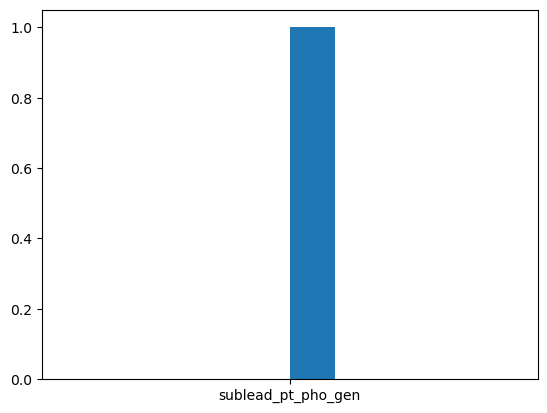

In [11]:
# plt.hist("lead_pt_pho_gen");
plt.hist("sublead_pt_pho_gen")

In [4]:
# Sort reco photons by pt
sorted_reco_photons = Events.Photon[ak.argsort(Events.Photon.pt, axis=1, ascending=False)]

# Select events with ≥2 photons
has_two = ak.num(sorted_reco_photons.pt) > 1
lead_pt = sorted_reco_photons.pt[has_two][:, 0]
sublead_pt = sorted_reco_photons.pt[has_two][:, 1]

# Apply cut on leading photon pt > 30
cut_mask = lead_pt > 30
sublead_pt_cut = sublead_pt[cut_mask]

# Convert to numpy for ROOT
sublead_pt_np = ak.to_numpy(sublead_pt_cut)

# Create histogram
hist = ROOT.TH1F("h_sublead_pt", "Sublead photon pT (Lead pT > 30 GeV);p_{T}^{sublead} [GeV];Events", 200, 0, 200)

# Fill histogram
for pt in sublead_pt_np:
    hist.Fill(pt)

# Draw
c = ROOT.TCanvas("c", "Canvas", 800, 600)
hist.SetLineColor(ROOT.kBlue)
hist.SetLineWidth(2)
hist.Draw("HIST")
c.SetGrid()
c.Update()
c.SaveAs("sublead_photon_pt_after_lead30cut.png")

Warning in <TROOT::Append>: Replacing existing TH1: h_sublead_pt (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file sublead_photon_pt_after_lead30cut.png has been created


pho_from_a_pt [[2.05, 85], [8.09, 81.8], [28.2, 3.66], ..., [...], [51.4, 18.2], [30.5, 57.5]]
pho_from_a_eta [[-1.2, -1.08], [1.77, 1.22], [...], ..., [-0.169, -0.308], [-1.46, -1.92]]
pho_from_a_phi [[1.38, -0.334], [-3.07, -2.52], [...], ..., [-3.12, 2.52], [-1.69, -1.58]]


Info in <TCanvas::Print>: png file gen1_vs_sel1.png has been created
Info in <TCanvas::Print>: png file gen2_vs_sel2.png has been created


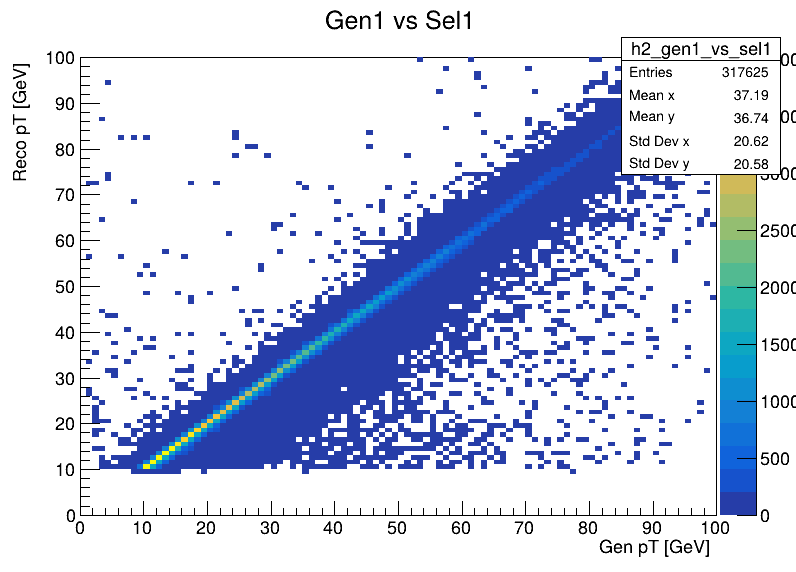

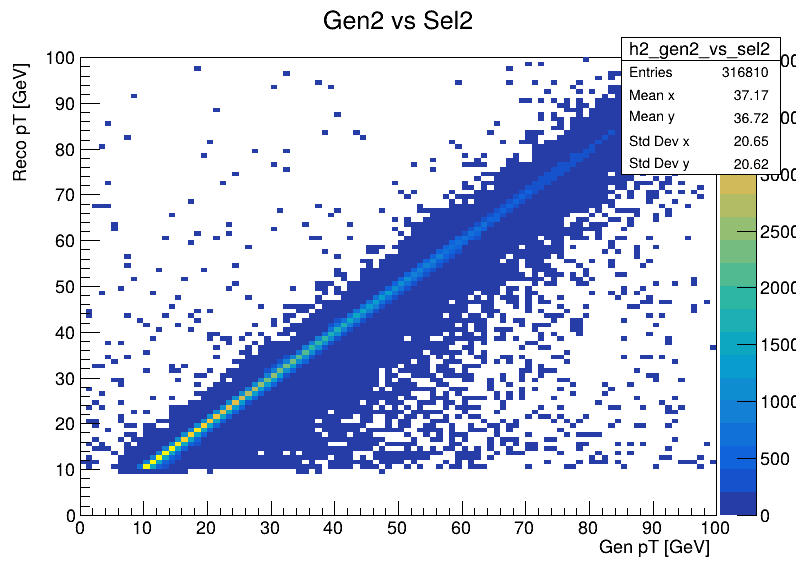

In [6]:
import awkward as ak 
import numpy as np
import ROOT

# Events = ak.from_parquet("Events.parquet")
gen = Events.GenPart

# Step 1: Select all prompt photons (pdgId == 22)
# photons = gen[gen.pdgId == 22]
photons = gen[(gen.pdgId == 22) & (gen.status == 1)]

# Step 2: Get mother indices for each photon
mother_idx = photons.genPartIdxMother

# Step 3: Check if mother's pdgId == 35
from_a_mask = gen[mother_idx].pdgId == 35

# Step 4: Apply mask to get only photons from a
photons_from_a = photons[from_a_mask]

mask_two_photons = ak.num(photons_from_a.eta) >= 2
photons_from_a = photons_from_a[mask_two_photons]

pho_from_a_pt = photons_from_a.pt
pho_from_a_eta = photons_from_a.eta 
pho_from_a_phi = photons_from_a.phi

print("pho_from_a_pt", pho_from_a_pt)
print("pho_from_a_eta", pho_from_a_eta)
print("pho_from_a_phi", pho_from_a_phi)

pho_from_a_pt_1 = pho_from_a_pt[:,0]
pho_from_a_pt_2 = pho_from_a_pt[:,1]
pho_from_a_eta_1 = pho_from_a_eta[:,0]  
pho_from_a_eta_2 = pho_from_a_eta[:,1]
pho_from_a_phi_1 = pho_from_a_phi[:,0]
pho_from_a_phi_2 = pho_from_a_phi[:,1]

Reco_photons = Events.Photon[mask_two_photons]

Reco_pho_pt = Reco_photons.pt
Reco_pho_eta = Reco_photons.eta
Reco_pho_phi = Reco_photons.phi

def dR(Pho_gen_eta, Pho_gen_phi, Pho_reco_eta, Pho_reco_phi):
    d_eta = Pho_gen_eta - Pho_reco_eta
    d_phi = Pho_gen_phi - Pho_reco_phi
    return np.sqrt(d_eta**2 + d_phi**2)

dR_pho_1 = dR(pho_from_a_eta_1, pho_from_a_phi_1, Reco_pho_eta, Reco_pho_phi)
dR_pho_2 = dR(pho_from_a_eta_2, pho_from_a_phi_2, Reco_pho_eta, Reco_pho_phi)

# Step 1: Index of photon with minimum dR per event
min_idx_1 = ak.argmin(dR_pho_1, axis=1)
min_idx_2 = ak.argmin(dR_pho_2, axis=1)

# Step 2: Build photon index array
photon_idx = ak.local_index(Reco_photons)

# Step 3: Mask where photon index matches minimum dR index
mask_idx_1 = photon_idx == min_idx_1[:, None]   
mask_idx_2 = photon_idx == min_idx_2[:, None]

# Step 4: Also require dR < 0.1
mask_dR_1 = dR_pho_1 < 0.1
mask_dR_2 = dR_pho_2 < 0.1

# Step 5: Combine masks
mask_sel_1 = mask_idx_1 & mask_dR_1
mask_sel_2 = mask_idx_2 & mask_dR_2

# Step 6: Select photons satisfying both conditions
selected_photon_1 = ak.firsts(Reco_photons[mask_sel_1])
selected_photon_2 = ak.firsts(Reco_photons[mask_sel_2])

selected_pho_pt_1 = selected_photon_1.pt
selected_pho_pt_2 = selected_photon_2.pt

# Convert awkward arrays to flat numpy arrays, removing invalid entries
gen1 = ak.to_numpy(pho_from_a_pt_1[~ak.is_none(selected_pho_pt_1)])
sel1 = ak.to_numpy(selected_pho_pt_1[~ak.is_none(selected_pho_pt_1)])
gen2 = ak.to_numpy(pho_from_a_pt_2[~ak.is_none(selected_pho_pt_2)])
sel2 = ak.to_numpy(selected_pho_pt_2[~ak.is_none(selected_pho_pt_2)])

# Create histograms
h2_gen1_vs_sel1 = ROOT.TH2F("h2_gen1_vs_sel1", "Gen1 vs Sel1; Gen pT [GeV]; Reco pT [GeV]", 
                            100, 0, 100, 100, 0, 100)
h2_gen2_vs_sel2 = ROOT.TH2F("h2_gen2_vs_sel2", "Gen2 vs Sel2; Gen pT [GeV]; Reco pT [GeV]", 
                            100, 0, 100, 100, 0, 100)

# Fill histograms
for g, s in zip(gen1, sel1):
    h2_gen1_vs_sel1.Fill(g, s)

for g, s in zip(gen2, sel2):
    h2_gen2_vs_sel2.Fill(g, s)

# Draw histograms
canvas1 = ROOT.TCanvas("c1", "Gen1 vs Sel1", 800, 600)
h2_gen1_vs_sel1.Draw("COLZ")
canvas1.SaveAs("gen1_vs_sel1.png")
canvas1.Draw()

canvas2 = ROOT.TCanvas("c2", "Gen2 vs Sel2", 800, 600)
h2_gen2_vs_sel2.Draw("COLZ")
canvas2.SaveAs("gen2_vs_sel2.png")
canvas2.Draw()


In [25]:
selected_photon_1.mass[:10]

<Array [None, None, 8.43e-08, ..., 3.02e-06, -1.46e-07] type='10 * ?float32'>

In [23]:
selected_bjet_1.mass

<Array [7.05, 5.12, 4.02, 7.05, ..., 7.82, 7.22, 5.33] type='79664 * ?float32'>

In [15]:
higgs_mask = (Events_ak.GenPart.pdgId == 25) & (Events_ak.GenPart.status == 22)
higgs_mask2 = (Events_ak.GenPart.pdgId == 25) & (Events_ak.GenPart.status == 62)
higgs22 = Events_ak.GenPart[higgs_mask]
higgs62 = Events_ak.GenPart[higgs_mask2]
ak.all(higgs22.pt==higgs62.pt)
# higgs22.genPartIdxMother

False

In [7]:
len(Events_ak)

476000

In [4]:
all_higgs = Events_ak.GenPart[Events_ak.GenPart.pdgId == 25]
unique_status = np.unique(ak.flatten(all_higgs.status))
print("Unique Higgs status values:", unique_status)

Unique Higgs status values: [22, 44, 62]


In [16]:
all_As = Events_ak.GenPart[Events_ak.GenPart.pdgId == 35]
unique_status = np.unique(ak.flatten(all_As.status))
print("Unique As status values:", unique_status)

Unique As status values: [22]


In [16]:
all_photons = Events.GenPart[Events.GenPart.pdgId == 22]
unique_status_photons = np.unique(ak.flatten(all_photons.status))
print("Unique Photons status values:", unique_status_photons)

Unique Photons status values: [1, 23, 51, 52]


In [26]:
photons_mask = (Events.GenPart.pdgId == 22) & (Events.GenPart.status == 23)
photons = Events.GenPart[photons_mask]
ak.max(ak.num(photons.pt))
# photons.pt
non_empty_pt = ak.num(photons.pt)>0
photons.pt[non_empty_pt]

<Array [[60.8, 7.73], [8.06, ... [44, 17.6]] type='26480 * var * float32'>

In [37]:
all_bquarks = Events.GenPart[abs(Events.GenPart.pdgId) == 5]
unique_status_bquarks = np.unique(ak.flatten(all_bquarks.status))
print("Unique bquarks status values:", unique_status_bquarks)

Unique bquarks status values: [23, 31, 33, 41, 43, 44, 51, 52, 62, 71, 72, 73]


In [53]:
bquarks_mask = (abs(Events.GenPart.pdgId) == 5) & (Events.GenPart.status == 23)
bquarks = Events.GenPart[bquarks_mask]
ak.max(ak.num(bquarks.pt))
# photons.pt
non_empty_pt_bquarks = ak.num(bquarks.pt)>0
bquarks.pt[non_empty_pt_bquarks]

<Array [[53.4, 84.2], ... [17.5, 23.2]] type='476000 * var * float32'>

In [60]:
Jets = Events.Jet
print(ak.num(Jets))
bjets = Events.Jet[(Events.Jet.hadronFlavour == 5)]
print(ak.max(ak.num(bjets)))

[2, 5, 3, 5, 5, 5, 5, 9, 5, 9, 5, 3, 4, ... 6, 5, 3, 5, 4, 6, 5, 5, 4, 7, 8, 11, 13]
5


In [7]:
bjets_all = Events.Jet[(Events.Jet.hadronFlavour == 5)]
# bjets = bjets_all[ak.num(bjets_all) >= 2]

# # Get gen-level b-quarks from 'a' (status == 23)
# gen_b = gen[(abs(gen.pdgId) == 5) & (gen.status == 23)]
# from_a_mask = abs(gen[gen_b.genPartIdxMother].pdgId) == 35
# gen_b_from_a = gen_b[from_a_mask]
# gen_b_from_a = gen_b_from_a[ak.num(bjets) >= 2]

gen = Events.GenPart

def dR(Pho_gen_eta, Pho_gen_phi, Pho_reco_eta, Pho_reco_phi):
    d_eta = Pho_gen_eta - Pho_reco_eta
    d_phi = Pho_gen_phi - Pho_reco_phi
    return np.sqrt(d_eta**2 + d_phi**2)

mask_bjets = ak.num(bjets_all) >= 2
bjets = bjets_all[mask_bjets]

gen_b = gen[(abs(gen.pdgId) == 5) & (gen.status == 23)]
from_a_mask = abs(gen[gen_b.genPartIdxMother].pdgId) == 35
gen_b_from_a = gen_b[from_a_mask]

gen_b_from_a = gen_b_from_a[mask_bjets]

# Select leading two b-quarks
b_eta_1 = gen_b_from_a.eta[:, 0]
b_phi_1 = gen_b_from_a.phi[:, 0]
b_eta_2 = gen_b_from_a.eta[:, 1]
b_phi_2 = gen_b_from_a.phi[:, 1]

print(len(b_eta_1))

gen_Jets = Events.GenJet

print(gen_Jets.fields)

print(ak.num(gen_Jets))

print(bjets.fields)

print(bjets)
print(len(bjets_all.pt))
print(len(bjets.pt))

jet_pt = bjets.pt
jet_eta = bjets.eta
jet_phi = bjets.phi

# ΔR matching
dR_b1 = dR(b_eta_1, b_phi_1, jet_eta, jet_phi)
dR_b2 = dR(b_eta_2, b_phi_2, jet_eta, jet_phi)

# Find closest reco jet
min_idx_1 = ak.argmin(dR_b1, axis=1)
min_idx_2 = ak.argmin(dR_b2, axis=1)
jet_idx = ak.local_index(bjets)

mask_1 = (jet_idx == min_idx_1[:, None]) & (dR_b1 < 0.4)
mask_2 = (jet_idx == min_idx_2[:, None]) & (dR_b2 < 0.4)

# mask_1 = (jet_idx == min_idx_1[:, None])
# mask_2 = (jet_idx == min_idx_2[:, None]) 

# Select matched reco jets
selected_bjet_1 = ak.firsts(bjets[mask_1])
selected_bjet_2 = ak.firsts(bjets[mask_2])

# Kinematics of selected reco b-jets
bjet1_pt  = selected_bjet_1.pt
bjet1_eta = selected_bjet_1.eta
bjet1_phi = selected_bjet_1.phi

bjet2_pt  = selected_bjet_2.pt
bjet2_eta = selected_bjet_2.eta
bjet2_phi = selected_bjet_2.phi

79664
['eta', 'mass', 'phi', 'pt', 'partonFlavour', 'hadronFlavour']
[5, 4, 3, 4, 5, 5, 4, 6, 6, 6, 4, 5, 6, ..., 6, 3, 5, 4, 6, 5, 5, 8, 9, 5, 7, 6]
['area', 'btagCSVV2', 'btagDeepB', 'btagDeepCvB', 'btagDeepCvL', 'btagDeepFlavB', 'btagDeepFlavCvB', 'btagDeepFlavCvL', 'btagDeepFlavQG', 'chEmEF', 'chFPV0EF', 'chHEF', 'eta', 'hfsigmaEtaEta', 'hfsigmaPhiPhi', 'mass', 'muEF', 'muonSubtrFactor', 'neEmEF', 'neHEF', 'phi', 'pt', 'puIdDisc', 'qgl', 'rawFactor', 'bRegCorr', 'bRegRes', 'cRegCorr', 'cRegRes', 'electronIdx1', 'electronIdx2', 'hfadjacentEtaStripsSize', 'hfcentralEtaStripSize', 'jetId', 'muonIdx1', 'muonIdx2', 'nElectrons', 'nMuons', 'puId', 'nConstituents', 'genJetIdx', 'hadronFlavour', 'partonFlavour', 'cleanmask']
[[{area: 0.469, btagCSVV2: 0.246, btagDeepB: 0.136, ...}, {...}], ..., [...]]
476000
79664


In [21]:
ak.any(ak.num(jet_pt)>4)

True

In [22]:
jet_pt

<Array [[80.5, 27.6], [...], ..., [26.7, 21.9]] type='79664 * var * float32'>

In [25]:
sorted_reco_bjets = bjets[ak.argsort(bjets.pt, axis=1, ascending=False)]
has_lead = ak.num(sorted_reco_bjets.pt) > 0
Reco_lead_bjet_pt = sorted_reco_bjets.pt[has_lead][:, 0]
Reco_lead_bjet_eta = sorted_reco_bjets.eta[has_lead][:, 0]
Reco_sublead_bjet_phi = sorted_reco_bjets.phi[has_lead][:, 0]
Reco_sublead_bjet_pt = sorted_reco_bjets.pt[has_lead][:, 1]
Reco_sublead_bjet_eta = sorted_reco_bjets.eta[has_lead][:, 1]
Reco_sublead_bjet_phi = sorted_reco_bjets.phi[has_lead][:, 1]

In [24]:
Reco_lead_bjet_pt

<Array [80.5, 31.1, 49.6, 60.4, ..., 50.5, 31.3, 26.7] type='79664 * float32'>

In [26]:
Reco_sublead_bjet_pt

<Array [27.6, 25, 18.8, 20.7, ..., 28.6, 23.1, 21.9] type='79664 * float32'>

In [119]:
bjets.eta

<Array [[-2.32, -3.05], ... [-1.62, -1.19]] type='79664 * var * float32'>

In [120]:
gen_b_from_a.eta

<Array [[-2.91, -2.59], ... [-1.84, -1.29]] type='79664 * var * float32'>

In [121]:
print(dR_b1[0:10])

[[1.18, 0.32], [0.03, 0.756], [0.568, ... 0.0385], [0.0112, 0.774], [0.64, 0.075]]


In [112]:
selected_bjet_1.pt

<Array [None, None, None, ... None, None, None] type='79664 * ?float32'>

In [115]:
n_valid = ak.count(selected_bjet_1.pt, axis=0)
print(n_valid)

1794


In [89]:
jet_pt

<Array [[80.5, 27.6], ... [26.7, 21.9]] type='79664 * var * float32'>

In [91]:
bjet1_pt

<Array [80.5, 25, 49.6, ... 28.6, 31.3, 26.7] type='79664 * ?float32'>

In [27]:
# Convert awkward arrays to NumPy
gen_b1_pt = ak.to_numpy(gen_b_from_a.pt[:, 0])
gen_b2_pt = ak.to_numpy(gen_b_from_a.pt[:, 1])
reco_b1_pt = ak.to_numpy(bjet1_pt)
reco_b2_pt = ak.to_numpy(bjet2_pt)


In [83]:
len(gen_b1_pt)

79664

In [84]:
np.savetxt("output.txt",gen_b1_pt)

In [85]:
np.savetxt("output_reco.txt",reco_b1_pt)

In [28]:
# Create canvas
c1 = ROOT.TCanvas("c1", "Overlay: Gen and Reco b-jet pT", 800, 600)

# Histograms
h_gen_b1   = ROOT.TH1F("h_gen_b1", "Gen vs Reco b-jet pT; pT [GeV]; Events", 50, 0, 200)
h_gen_b2   = ROOT.TH1F("h_gen_b2", "", 50, 0, 200)
h_reco_b1  = ROOT.TH1F("h_reco_b1", "", 50, 0, 200)
h_reco_b2  = ROOT.TH1F("h_reco_b2", "", 50, 0, 200)

# Fill
for pt in gen_b1_pt:   h_gen_b1.Fill(pt)
for pt in gen_b2_pt:   h_gen_b2.Fill(pt)
for pt in reco_b1_pt:  h_reco_b1.Fill(pt)
for pt in reco_b2_pt:  h_reco_b2.Fill(pt)

# Style
h_gen_b1.SetLineColor(ROOT.kRed)
h_gen_b2.SetLineColor(ROOT.kOrange+2)
h_reco_b1.SetLineColor(ROOT.kBlue)
h_reco_b2.SetLineColor(ROOT.kGreen+2)

# # Normalize (optional, for shape comparison)
# h_gen_b1.Scale(1.0 / h_gen_b1.Integral())
# h_gen_b2.Scale(1.0 / h_gen_b2.Integral())
# h_reco_b1.Scale(1.0 / h_reco_b1.Integral())
# h_reco_b2.Scale(1.0 / h_reco_b2.Integral())

# Draw on same canvas
h_gen_b1.Draw("HIST")
h_gen_b2.Draw("HIST SAME")
h_reco_b1.Draw("HIST SAME")
h_reco_b2.Draw("HIST SAME")

# Add legend
legend = ROOT.TLegend(0.6, 0.7, 0.88, 0.88)
legend.AddEntry(h_gen_b1, "Gen b1 pT", "l")
legend.AddEntry(h_gen_b2, "Gen b2 pT", "l")
legend.AddEntry(h_reco_b1, "Reco b1 pT", "l")
legend.AddEntry(h_reco_b2, "Reco b2 pT", "l")
legend.Draw()

# Show grid and update canvas
c1.SetGrid()
c1.Draw()
c1.Update()
c1.SaveAs("canvas_1D_bjet_pt.png")


/tmp/bbapi/ipykernel_225193/3810700365.py:13: UserWarning: Warning: converting a masked element to nan.
  for pt in reco_b1_pt:  h_reco_b1.Fill(pt)
/tmp/bbapi/ipykernel_225193/3810700365.py:14: UserWarning: Warning: converting a masked element to nan.
  for pt in reco_b2_pt:  h_reco_b2.Fill(pt)
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file canvas_1D_bjet_pt.png has been created


In [105]:
gen_Jets.fields

['eta', 'mass', 'phi', 'pt', 'partonFlavour', 'hadronFlavour']

In [124]:
# Create canvases
c_gen = ROOT.TCanvas("c_gen", "Gen b-jet pT", 800, 600)
c_reco = ROOT.TCanvas("c_reco", "Reco b-jet pT", 800, 600)

# Histograms
h_gen_b1   = ROOT.TH1F("h_gen_b1", "Gen b-jet pT; pT [GeV]; Events", 100, 0, 200)
h_gen_b2   = ROOT.TH1F("h_gen_b2", "", 100, 0, 200)
h_reco_b1  = ROOT.TH1F("h_reco_b1", "Reco b-jet pT; pT [GeV]; Events", 100, 0, 200)
h_reco_b2  = ROOT.TH1F("h_reco_b2", "", 100, 0, 200)

# Fill
for pt in gen_b1_pt:   h_gen_b1.Fill(pt)
for pt in gen_b2_pt:   h_gen_b2.Fill(pt)
for pt in reco_b1_pt:  h_reco_b1.Fill(pt)
for pt in reco_b2_pt:  h_reco_b2.Fill(pt)

# Set styles
h_gen_b1.SetLineColor(ROOT.kRed)
h_gen_b2.SetLineColor(ROOT.kOrange+2)
h_reco_b1.SetLineColor(ROOT.kBlue)
h_reco_b2.SetLineColor(ROOT.kGreen+2)

# ---------- GEN Canvas ----------
c_gen.cd()
h_gen_b1.Draw("HIST")
h_gen_b2.Draw("HIST SAME")
legend_gen = ROOT.TLegend(0.6, 0.7, 0.88, 0.88)
legend_gen.AddEntry(h_gen_b1, "Gen b1 pT", "l")
legend_gen.AddEntry(h_gen_b2, "Gen b2 pT", "l")
legend_gen.Draw()
c_gen.SetGrid()
c_gen.Update()
c_gen.SaveAs("gen_bjet_pt.png")

# ---------- RECO Canvas ----------
c_reco.cd()
h_reco_b1.Draw("HIST")
h_reco_b2.Draw("HIST SAME")
legend_reco = ROOT.TLegend(0.6, 0.7, 0.88, 0.88)
legend_reco.AddEntry(h_reco_b1, "Reco b1 pT", "l")
legend_reco.AddEntry(h_reco_b2, "Reco b2 pT", "l")
legend_reco.Draw()
c_reco.SetGrid()
c_reco.Update()
c_reco.SaveAs("reco_bjet_pt.png")


/tmp/bbapi/ipykernel_3857453/3062662257.py:14: UserWarning: Warning: converting a masked element to nan.
  for pt in reco_b1_pt:  h_reco_b1.Fill(pt)
/tmp/bbapi/ipykernel_3857453/3062662257.py:15: UserWarning: Warning: converting a masked element to nan.
  for pt in reco_b2_pt:  h_reco_b2.Fill(pt)
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_gen
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_reco
Warning in <TROOT::Append>: Replacing existing TH1: h_gen_b1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_gen_b2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco_b1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_reco_b2 (Potential memory leak).
Info in <TCanvas::Print>: png file gen_bjet_pt.png has been created
Info in <TCanvas::Print>: png file reco_bjet_pt.png has been created


In [29]:
# Create canvas
c2 = ROOT.TCanvas("c2", "2D Gen vs Reco pT", 1200, 500)
c2.Divide(2, 1)

# 2D for b1
c2.cd(1)
h2d_b1 = ROOT.TH2F("h2d_b1", "b1: Gen vs Reco pT; Gen pT [GeV]; Reco pT [GeV]", 50, 0, 100, 50, 0, 100)
for x, y in zip(gen_b1_pt, reco_b1_pt):
    h2d_b1.Fill(x, y)
h2d_b1.Draw("COLZ")

# 2D for b2
c2.cd(2)
h2d_b2 = ROOT.TH2F("h2d_b2", "b2: Gen vs Reco pT; Gen pT [GeV]; Reco pT [GeV]", 50, 0, 100, 50, 0, 100)
for x, y in zip(gen_b2_pt, reco_b2_pt):
    h2d_b2.Fill(x, y)
h2d_b2.Draw("COLZ")

# Show canvas
c2.Draw()
c2.Update()
c2.SaveAs("canvas_2D_bjet_gen_vs_reco.png")


/tmp/bbapi/ipykernel_225193/948942437.py:9: UserWarning: Warning: converting a masked element to nan.
  h2d_b1.Fill(x, y)
/tmp/bbapi/ipykernel_225193/948942437.py:16: UserWarning: Warning: converting a masked element to nan.
  h2d_b2.Fill(x, y)
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file canvas_2D_bjet_gen_vs_reco.png has been created


In [133]:
selected_bjet_1.mass

<Array [7.05, 5.12, 4.02, ... 7.82, 7.22, 5.33] type='79664 * ?float32'>

In [13]:
import awkward as ak

print(type(selected_bjet_1.pt))
print(len(selected_bjet_1.pt))
print(len(selected_bjet_1.eta))
print(len(selected_bjet_2.pt))
# all should be <class 'awkward.highlevel.Array'> and same length


<class 'awkward.highlevel.Array'>
79664
79664
79664


In [8]:
# import ROOT
import numpy as np

# Assume these are Awkward Arrays of shape (N,)
pt1, eta1, phi1, mass1 = selected_bjet_1.pt, selected_bjet_1.eta, selected_bjet_1.phi, selected_bjet_1.mass
pt2, eta2, phi2, mass2 = selected_bjet_2.pt, selected_bjet_2.eta, selected_bjet_2.phi, selected_bjet_2.mass

# Convert to NumPy arrays
pt1 = ak.to_numpy(pt1)
eta1 = ak.to_numpy(eta1)
phi1 = ak.to_numpy(phi1)
mass1 = ak.to_numpy(mass1)
pt2 = ak.to_numpy(pt2)
eta2 = ak.to_numpy(eta2)
phi2 = ak.to_numpy(phi2)
mass2 = ak.to_numpy(mass2)

# Mask invalid entries (NaNs or None)
valid_mask = ~np.isnan(pt1 + eta1 + phi1 + mass1 + pt2 + eta2 + phi2 + mass2)

pt1, eta1, phi1, mass1 = pt1[valid_mask], eta1[valid_mask], phi1[valid_mask], mass1[valid_mask]
pt2, eta2, phi2, mass2 = pt2[valid_mask], eta2[valid_mask], phi2[valid_mask], mass2[valid_mask]

# Create TLorentzVectors and compute invariant mass
invmasses = np.empty(len(pt1))
vec1 = ROOT.TLorentzVector()
vec2 = ROOT.TLorentzVector()

for i in range(len(pt1)):
    vec1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i])
    vec2.SetPtEtaPhiM(pt2[i], eta2[i], phi2[i], mass2[i])
    invmasses[i] = (vec1 + vec2).M()

# Now plot in ROOT
hist = ROOT.TH1F("h_invmass", "Invariant Mass of b-jets;M_{bb} [GeV];Events", 200, 0, 50)
for mass in invmasses:
    hist.Fill(mass)

c = ROOT.TCanvas()
hist.Draw()
c.SaveAs("invariant_mass_bb.png")


/tmp/bbapi/ipykernel_2867475/4208107255.py:31: UserWarning: Warning: converting a masked element to nan.
  vec2.SetPtEtaPhiM(pt2[i], eta2[i], phi2[i], mass2[i])
Info in <TCanvas::Print>: png file invariant_mass_bb.png has been created


In [26]:
type(invmasses)

numpy.ndarray

In [13]:
ak_array = invmasses

# Convert to NumPy flat array and count NaNs
flat_array = ak.flatten(ak_array, axis=None)
nan_count = np.sum(np.isnan(flat_array))

print("Number of NaN entries:", nan_count)

Number of NaN entries: 3110


In [ ]:
import uproot

file_url = "root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/WHToAA_AToBB_AToGG_M-20_TuneCP5_13TeV_madgraph_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/2530000/FB6A4557-3B3E-5E4A-900D-45A77C107EA2.root"

with uproot.open(file_url) as f:
    print(f.keys())

TLS: Unable to use cert+key file /tmp/x509up_u177868; does not exist.


In [ ]:
Reco_photons = Events.Photon[mask_two_photons]

Reco_pho_pt = Reco_photons.pt
Reco_pho_eta = Reco_photons.eta
Reco_pho_phi = Reco_photons.phi

def dR(Pho_gen_eta, Pho_gen_phi, Pho_reco_eta, Pho_reco_phi):
    d_eta = Pho_gen_eta - Pho_reco_eta
    d_phi = Pho_gen_phi - Pho_reco_phi
    return np.sqrt(d_eta**2 + d_phi**2)

dR_pho_1 = dR(pho_from_a_eta_1, pho_from_a_phi_1, Reco_pho_eta, Reco_pho_phi)
dR_pho_2 = dR(pho_from_a_eta_2, pho_from_a_phi_2, Reco_pho_eta, Reco_pho_phi)

# Step 1: Index of photon with minimum dR per event
min_idx_1 = ak.argmin(dR_pho_1, axis=1)
min_idx_2 = ak.argmin(dR_pho_2, axis=1)

# Step 2: Build photon index array
photon_idx = ak.local_index(Reco_photons)

# Step 3: Mask where photon index matches minimum dR index
mask_idx_1 = photon_idx == min_idx_1[:, None]   
mask_idx_2 = photon_idx == min_idx_2[:, None]

# Step 4: Also require dR < 0.1
mask_dR_1 = dR_pho_1 < 0.1
mask_dR_2 = dR_pho_2 < 0.1

# Step 5: Combine masks
mask_sel_1 = mask_idx_1 & mask_dR_1
mask_sel_2 = mask_idx_2 & mask_dR_2

both_matched_mask = ~ak.is_none(selected_photon_1.pt) & ~ak.is_none(selected_photon_2.pt)


Genmatched_photon_1_clean_both = selected_photon_1[both_matched_mask]
Genmatched_photon_2_clean_both = selected_photon_2[both_matched_mask]

Genmatched_pho_1_pt_both  = ak.to_numpy(Genmatched_photon_1_clean_both.pt)
Genmatched_pho_2_pt_both  = ak.to_numpy(Genmatched_photon_2_clean_both.pt)
Genmatched_pho_1_eta_both = ak.to_numpy(Genmatched_photon_1_clean_both.eta)
Genmatched_pho_2_eta_both = ak.to_numpy(Genmatched_photon_2_clean_both.eta)
Genmatched_pho_1_phi_both = ak.to_numpy(Genmatched_photon_1_clean_both.phi)
Genmatched_pho_2_phi_both = ak.to_numpy(Genmatched_photon_2_clean_both.phi)
Genmatched_pho_1_mass_both = np.zeros_like(Genmatched_pho_2_phi_both, dtype=np.float32)
Genmatched_pho_2_mass_both = np.zeros_like(Genmatched_pho_2_phi_both, dtype=np.float32)

In [38]:
len(Genmatched_pho_1_pt)

225756

In [39]:
len(Genmatched_pho_2_pt)

225756

In [1]:
pho_from_a_pt_1

NameError: name 'pho_from_a_pt_1' is not defined

In [1]:
import uproot

In [2]:
fname = "FB6A4557-3B3E-5E4A-900D-45A77C107EA2.root"

In [3]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    # Tree_2 = Hfile["Runs"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [4]:
Events.fields

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nSubGenJetAK8',
 'Generator_binvar',
 'Generator_scalePDF',
 'Generator_weight',
 'Generator_x1',
 'Generator_x2',
 'Generator_xpdf1',
 'Generator_xpdf2',
 'Generator_id1'

In [6]:
import awkward as ak

In [7]:
gen = Events.GenPart
higgs_mask = (gen.pdgId == 25) & (gen.status == 62)
higgs = gen[higgs_mask]

higgs_pt = ak.flatten(higgs.pt)
higgs_eta = ak.flatten(higgs.eta)
higgs_phi = ak.flatten(higgs.phi)

In [24]:
Events.show()

[{run: 1, luminosityBlock: 1, event: 7, HTXS_Higgs_pt: 162, ...},
 {run: 1, luminosityBlock: 1, event: 3, HTXS_Higgs_pt: 71.9, ...},
 {run: 1, luminosityBlock: 1, event: 5, HTXS_Higgs_pt: 108, ...},
 {run: 1, luminosityBlock: 1, event: 2, HTXS_Higgs_pt: 13.9, ...},
 {run: 1, luminosityBlock: 1, event: 1, HTXS_Higgs_pt: 60.6, ...},
 {run: 1, luminosityBlock: 1, event: 4, HTXS_Higgs_pt: 151, ...},
 {run: 1, luminosityBlock: 1, event: 11, HTXS_Higgs_pt: 50.3, ...},
 {run: 1, luminosityBlock: 1, event: 14, HTXS_Higgs_pt: 68.6, ...},
 {run: 1, luminosityBlock: 1, event: 9, HTXS_Higgs_pt: 2.55, ...},
 {run: 1, luminosityBlock: 1, event: 6, HTXS_Higgs_pt: 49.5, ...},
 ...,
 {run: 1, luminosityBlock: 885, event: 884982, HTXS_Higgs_pt: 92.6, ...},
 {run: 1, luminosityBlock: 885, event: 884984, HTXS_Higgs_pt: 167, ...},
 {run: 1, luminosityBlock: 885, event: 884996, HTXS_Higgs_pt: 59.9, ...},
 {run: 1, luminosityBlock: 885, event: 884994, HTXS_Higgs_pt: 38.1, ...},
 {run: 1, luminosityBlock: 885

In [9]:
h_pt = higgs_pt

In [29]:
h_eta = higgs_eta

In [31]:
for i in range(10000):
    # if h_eta[i]>200.0:
    print(f"pt_{i} = {h_eta[i]:.12f}")

pt_0 = -1.144531250000
pt_1 = -2.328125000000
pt_2 = 2.843750000000
pt_3 = 3.343750000000
pt_4 = 3.000000000000
pt_5 = 2.398437500000
pt_6 = 4.250000000000
pt_7 = -1.687500000000
pt_8 = 6.609375000000
pt_9 = -4.234375000000
pt_10 = -1.781250000000
pt_11 = -2.296875000000
pt_12 = -0.321289062500
pt_13 = 1.878906250000
pt_14 = 0.501953125000
pt_15 = 3.906250000000
pt_16 = 0.489257812500
pt_17 = 2.210937500000
pt_18 = -0.835937500000
pt_19 = -1.957031250000
pt_20 = -2.679687500000
pt_21 = -0.609375000000
pt_22 = -2.210937500000
pt_23 = -3.382812500000
pt_24 = -2.148437500000
pt_25 = -3.125000000000
pt_26 = 1.589843750000
pt_27 = 0.222656250000
pt_28 = 1.164062500000
pt_29 = 3.367187500000
pt_30 = -0.619140625000
pt_31 = 1.988281250000
pt_32 = 1.050781250000
pt_33 = -3.156250000000
pt_34 = 1.824218750000
pt_35 = -5.984375000000
pt_36 = -2.375000000000
pt_37 = -3.500000000000
pt_38 = 1.832031250000
pt_39 = 2.921875000000
pt_40 = 0.311523437500
pt_41 = -1.847656250000
pt_42 = 2.554687500000
